# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular deep learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in deep learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of deep learning. 🤖📈



In [1]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transform to normalize the data
transform = transforms.Compose([
    # Add necessary transformations
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 73639027.48it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 63890133.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31125184.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10830317.66it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
num_train_images = len(train_set)
num_test_images = len(test_set)

print(f'Number of images in the train set is: {num_train_images} \n')
print(f'Number of images in the test set is: {num_test_images}\n')

Number of images in the train set is: 60000 

Number of images in the test set is: 10000



## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [62]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 10) # First fully connected layer

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = F.log_softmax(self.fc1(x), dim=1)
        return x

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [26]:
from torch.optim import SGD

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

num_epochs = 50

train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        predicted = torch.max(outputs.data, 1)[1]

        running_loss += loss.item()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    else:
        accuracy = correct_train / total_train * 100
        print(f"Epoch {epoch+1} \n - Train: Loss: {running_loss/len(train_loader)} - Accuracy: {accuracy}%")
    train_losses.append(running_loss)
    train_accuracy.append(accuracy)

    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
      for images, labels in test_loader:

          outputs = model(images)
          tloss = criterion(outputs, labels)
          predicted = torch.max(outputs.data, 1)[1]

          test_loss += tloss.item()
          total_test += labels.size(0)
          correct_test += (predicted == labels).sum().item()

      else:
          accuracy = correct_test / total_test * 100
          print(f" - Test: Loss: {test_loss/len(test_loader)} - Accuracy: {accuracy}%")
      test_losses.append(test_loss)
      test_accuracy.append(accuracy)

print("Training is finished!")

Epoch 1 
 - Train: Loss: 0.27070583769285095 - Accuracy: 92.44333333333333%
 - Test: Loss: 0.2718211358330052 - Accuracy: 92.33%
Epoch 2 
 - Train: Loss: 0.27024755336201267 - Accuracy: 92.455%
 - Test: Loss: 0.2728441295326705 - Accuracy: 92.25%
Epoch 3 
 - Train: Loss: 0.2696301659573116 - Accuracy: 92.45833333333333%
 - Test: Loss: 0.2741747439133039 - Accuracy: 92.36999999999999%
Epoch 4 
 - Train: Loss: 0.26878079260463145 - Accuracy: 92.51666666666667%
 - Test: Loss: 0.2795733540040103 - Accuracy: 92.03%
Epoch 5 
 - Train: Loss: 0.2678092218029982 - Accuracy: 92.52166666666668%
 - Test: Loss: 0.27295507924263457 - Accuracy: 92.33%
Epoch 6 
 - Train: Loss: 0.2674318484421859 - Accuracy: 92.47%
 - Test: Loss: 0.2717216879093818 - Accuracy: 92.15%
Epoch 7 
 - Train: Loss: 0.2671564597882696 - Accuracy: 92.62333333333333%
 - Test: Loss: 0.27584141657752975 - Accuracy: 92.41%
Epoch 8 
 - Train: Loss: 0.2665079245323947 - Accuracy: 92.54333333333334%
 - Test: Loss: 0.27257369726208175 

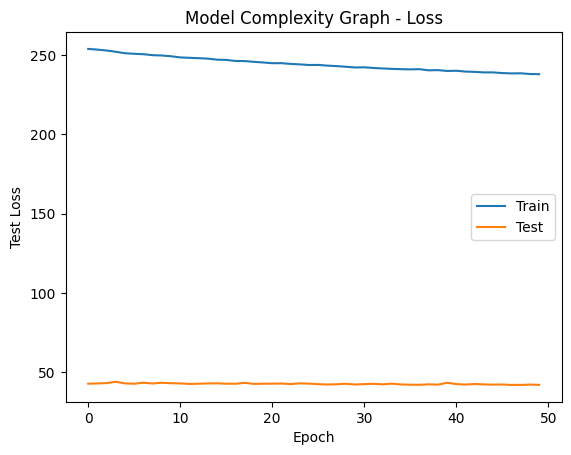

In [31]:
plt.plot(train_losses, label="Train")
plt.plot(test_losses, label="Test")

plt.title("Model Complexity Graph - Loss")
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

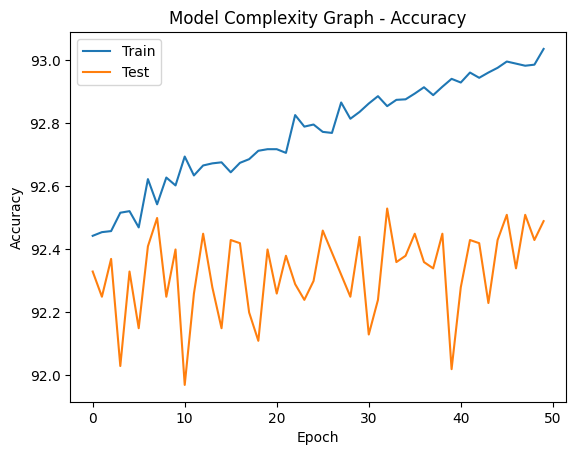

In [32]:
plt.plot(train_accuracy, label="Train")
plt.plot(test_accuracy, label="Test")

plt.title("Model Complexity Graph - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### TODO1: Comment the model complexity graph

- I've observed that increasing the number of epochs leads to a decrease in loss and an increase in accuracy for both train and test data.<br>
- However, the model's performance improvement is quite slow. While there is a slight decrease in train loss, the test loss remains constant throughout all epochs.<br>

- As we analyze the Complexity Graph using Accuracy, it becomes apparent that with each passing epoch, the gap between train and test accuracy is bigger. This indicates a potential overfitting threat for our relatively simple model.

### Creating More Complex Models:

In [5]:
#@title Net0: Neural Network with no Hidden Layers
class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = Net0()
print(model)

Net0(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [6]:
#@title Net1: Neural Network with 1 Hidden Layer
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = Net1()
print(model)

Net1(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (relu): ReLU()
)


In [7]:
#@title Net2: Neural Network with 2 Hidden Layers
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net2()
print(model)

Net2(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)


In [8]:
#@title Net3: Neural Network with 3 Hidden Layers
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net3()
print(model)

Net3(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
)


In [9]:
#@title Net4: Neural Network with 4 Hidden Layers
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net4()
print(model)

Net4(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [10]:
#@title Net5: Neural Network with 5 Hidden Layers
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net5()
print(model)

Net5(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


In [37]:
#@title Net6: Neural Network with 6 Hidden Layers
class Net6(nn.Module):
    def __init__(self):
        super(Net6, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 256)
        self.fc6 = nn.Linear(256, 32)
        self.fc7 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net6()
print(model)

Net6(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=32, bias=True)
  (fc7): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [33]:
# Import optimizer
from torch import optim
from torch.optim import SGD


criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# Set the number of epochs
num_epochs = 50

def train_and_test_model(model):

    print(f"******************** Training of model {type(model).__name__} starts! ********************")

    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01)

    num_epochs = 50

    train_losses = []
    test_losses = []

    train_accuracy = []
    test_accuracy = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            predicted = torch.max(outputs.data, 1)[1]

            running_loss += loss.item()
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        else:
            accuracy = correct_train / total_train * 100
            print(f"Epoch {epoch+1} \n - Train: Loss: {running_loss/len(train_loader)} - Accuracy: {accuracy}%")
        train_losses.append(running_loss)
        train_accuracy.append(accuracy)

        test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
          for images, labels in test_loader:

              outputs = model(images)
              tloss = criterion(outputs, labels)
              predicted = torch.max(outputs.data, 1)[1]

              test_loss += tloss.item()
              total_test += labels.size(0)
              correct_test += (predicted == labels).sum().item()

          else:
              accuracy = correct_test / total_test * 100
              print(f" - Test: Loss: {test_loss/len(test_loader)} - Accuracy: {accuracy}%")
          test_losses.append(test_loss)
          test_accuracy.append(accuracy)

    print(f"******************** Training of model {type(model).__name__} is finished! ********************")

    return train_losses, test_losses, train_accuracy, test_accuracy

In [41]:
import matplotlib.pyplot as plt
import numpy as np

models = [Net0(), Net1(), Net2(), Net3(), Net4(), Net5(), Net6()]

models_train_losses = []
models_test_losses = []

models_train_accuracy = []
models_test_accuracy = []

for model in models:
    train_losses, test_losses, train_accuracy, test_accuracy = train_and_test_model(model)
    models_train_losses.append(train_losses)
    models_test_losses.append(test_losses)
    models_train_accuracy.append(train_accuracy)
    models_test_accuracy.append(test_accuracy)

******************** Training of model Net0 starts! ********************
Epoch 1 
 - Train: Loss: 0.6159049533386983 - Accuracy: 84.24666666666667%
 - Test: Loss: 0.395559927009663 - Accuracy: 89.5%
Epoch 2 
 - Train: Loss: 0.3873947167765103 - Accuracy: 89.24333333333333%
 - Test: Loss: 0.3462611310611105 - Accuracy: 90.53%
Epoch 3 
 - Train: Loss: 0.35322818256962274 - Accuracy: 90.10000000000001%
 - Test: Loss: 0.3253692507767563 - Accuracy: 90.96%
Epoch 4 
 - Train: Loss: 0.3355195188382541 - Accuracy: 90.46833333333333%
 - Test: Loss: 0.31519203733913836 - Accuracy: 91.09%
Epoch 5 
 - Train: Loss: 0.3242327157717778 - Accuracy: 90.80833333333334%
 - Test: Loss: 0.3057186865621501 - Accuracy: 91.25999999999999%
Epoch 6 
 - Train: Loss: 0.31645477525810445 - Accuracy: 91.05499999999999%
 - Test: Loss: 0.30112058859152396 - Accuracy: 91.75%
Epoch 7 
 - Train: Loss: 0.31038550633802087 - Accuracy: 91.23%
 - Test: Loss: 0.296808991296466 - Accuracy: 91.64%
Epoch 8 
 - Train: Loss: 0.30

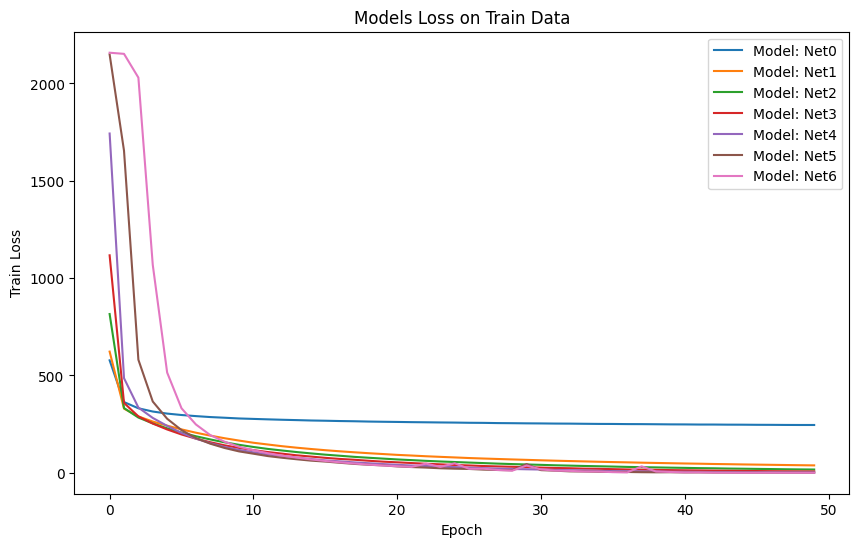

In [46]:
# Plot the model complexity graph
plt.figure(figsize=(10, 6))

i = 0

for model_train_losses in models_train_losses:
  plt.plot(model_train_losses, label=f"Model: Net{i}")
  i += 1

plt.title("Models Loss on Train Data")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.legend()
plt.show()

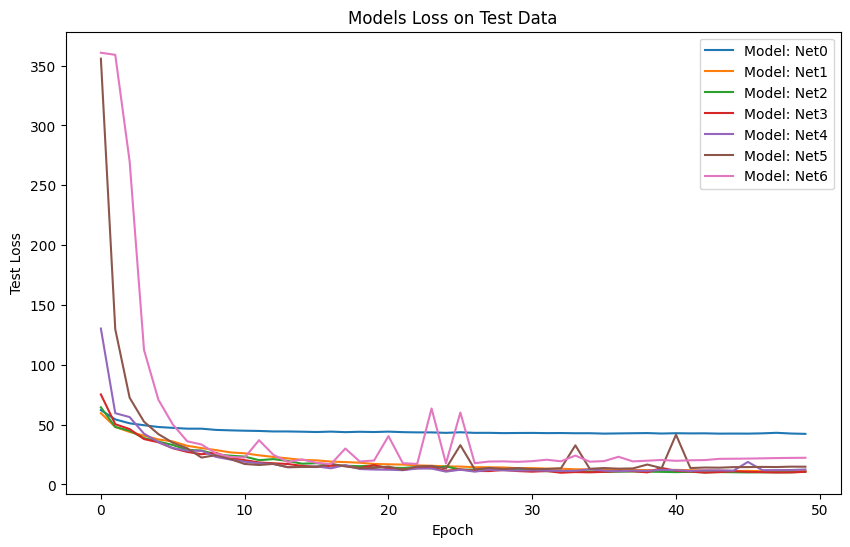

In [47]:
plt.figure(figsize=(10, 6))

i = 0

for model_test_losses in models_test_losses:
    plt.plot(model_test_losses, label=f"Model: Net{i}")
    i += 1

plt.title("Models Loss on Test Data")
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

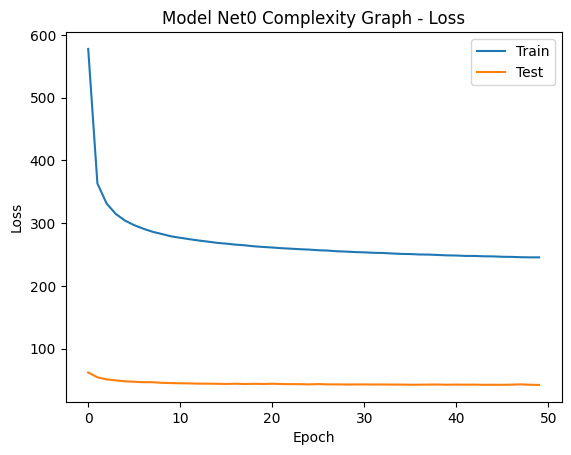

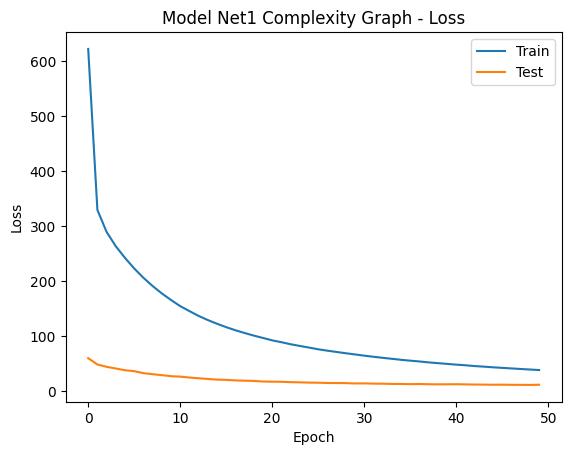

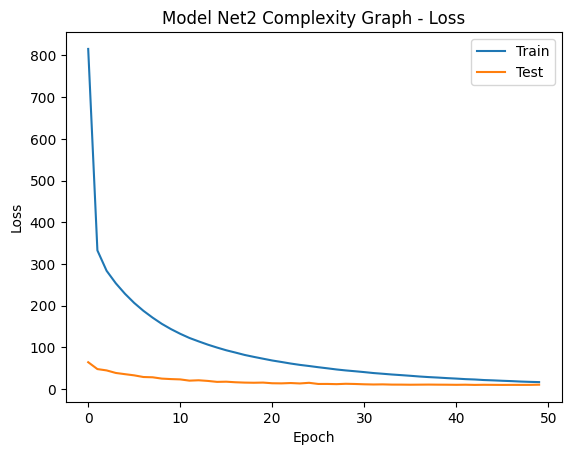

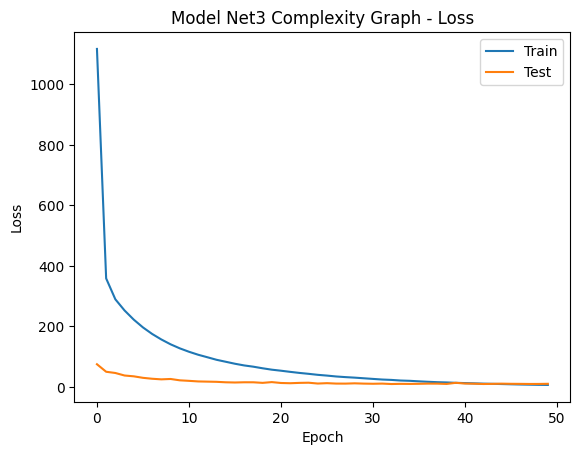

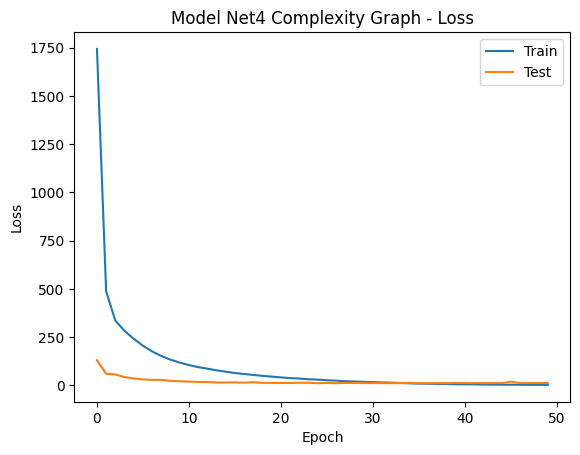

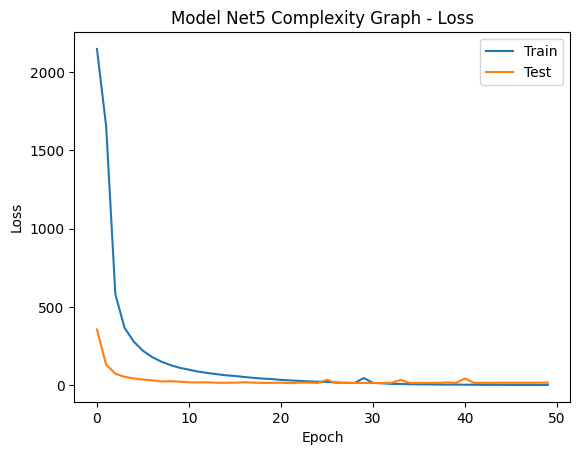

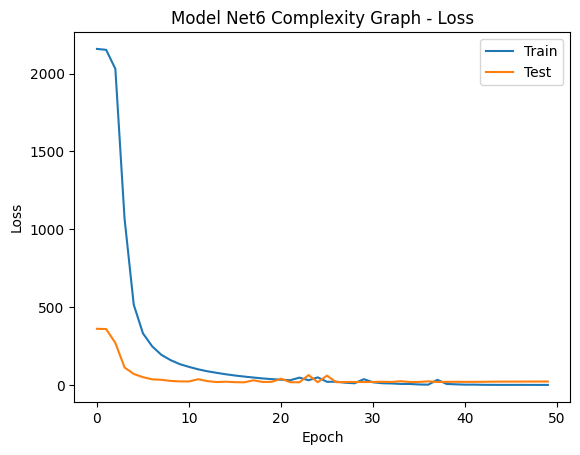

In [72]:
i = 0

for model_index in range(len(models)):
  model_train_losses = models_train_losses[model_index]
  model_test_losses = models_test_losses[model_index]
  plt.plot(model_train_losses, label="Train")
  plt.plot(model_test_losses, label="Test")
  plt.title(f"Model Net{i} Complexity Graph - Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
  i += 1

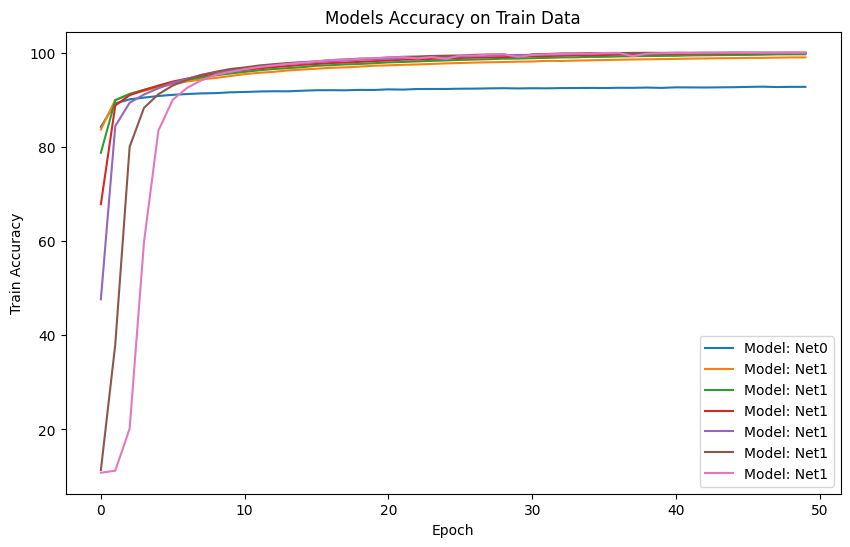

In [48]:
plt.figure(figsize=(10, 6))

i = 0

for model_train_accuracy in models_train_accuracy:
    plt.plot(model_train_accuracy, label=f"Model: Net{i}")
    i =+ 1

plt.title("Models Accuracy on Train Data")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.legend()
plt.show()


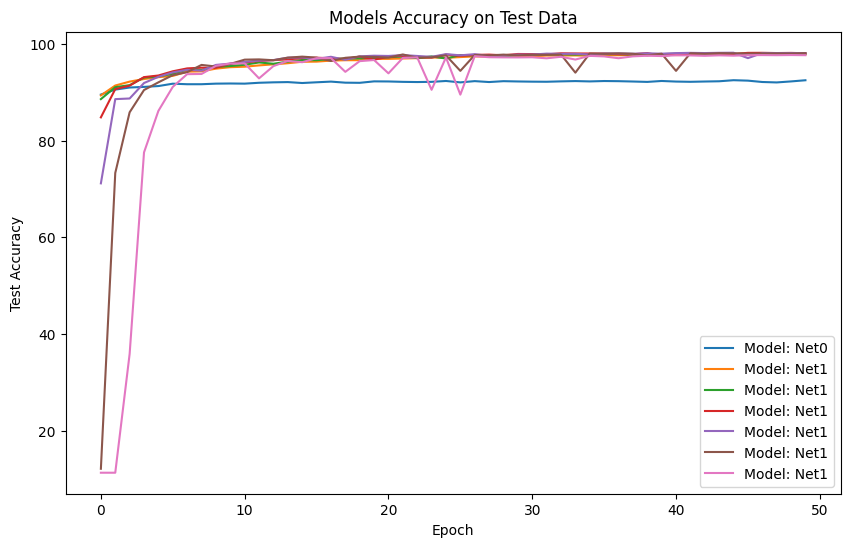

In [49]:
plt.figure(figsize=(10, 6))

i = 0

for model_test_accuracy in models_test_accuracy:
    plt.plot(model_test_accuracy, label=f"Model: Net{i}")
    i =+ 1

plt.title("Models Accuracy on Test Data")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()


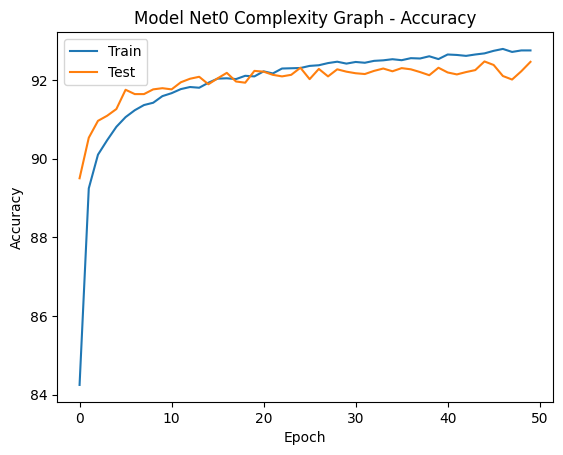

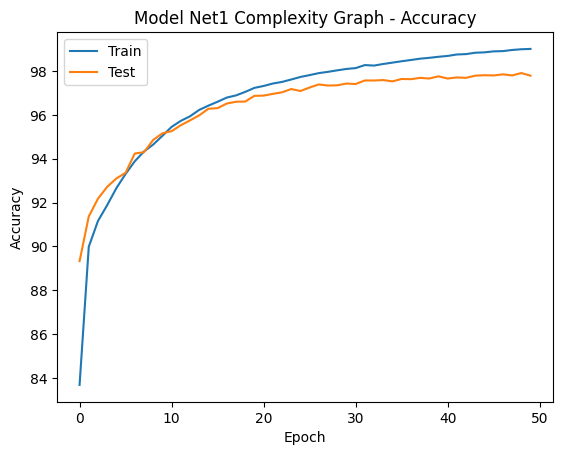

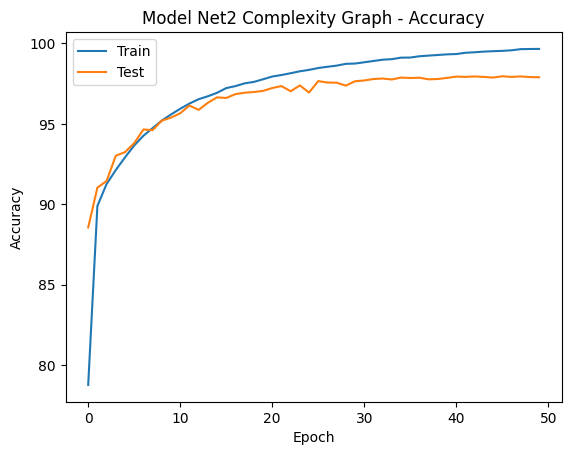

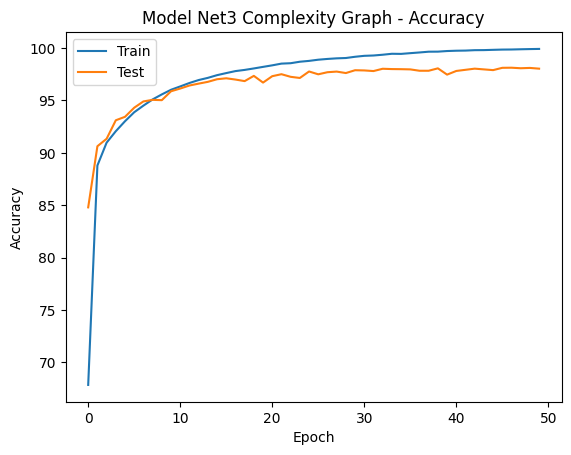

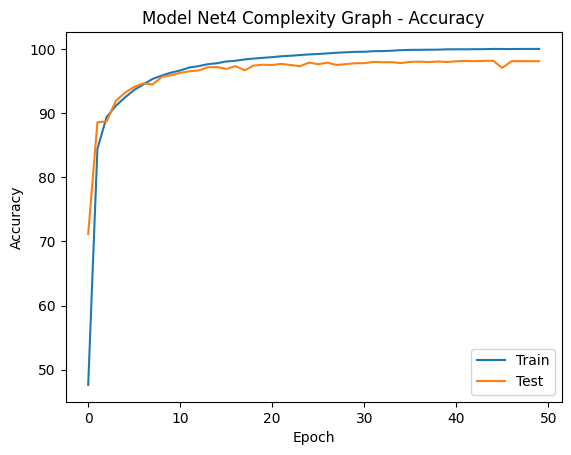

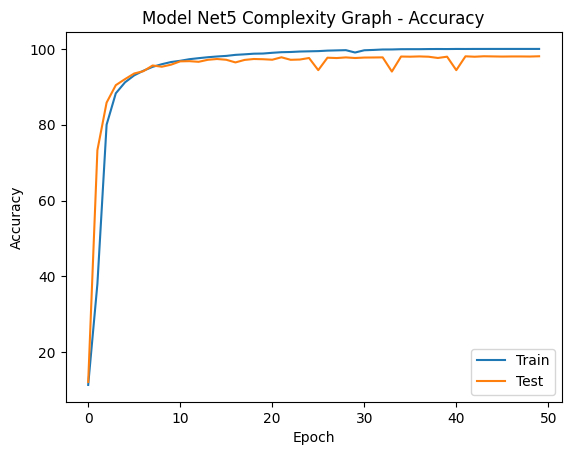

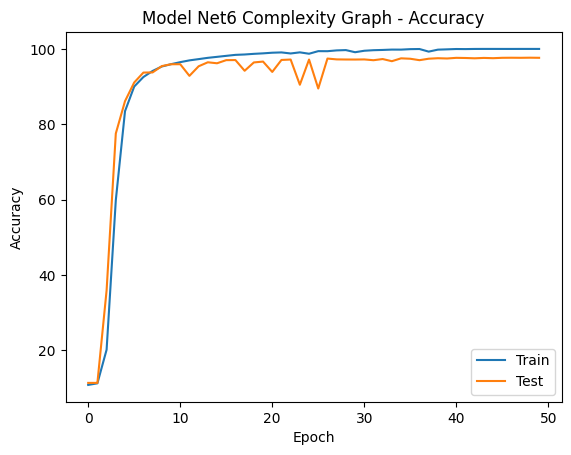

In [57]:
i = 0

for model_index in range(len(models)):
  model_train_accuracy = models_train_accuracy[model_index]
  model_test_accuracy = models_test_accuracy[model_index]
  plt.plot(model_train_accuracy, label="Train")
  plt.plot(model_test_accuracy, label="Test")
  plt.title(f"Model Net{i} Complexity Graph - Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()
  i += 1



### TODO2: Change the model and add more layer (use a complex model)

- Based on the graph, it is evident that the more complex the model, the higher its accuracy. The complex models show a much faster convergence to higher accuracy compared to the simpler models, as evident from Net5 which achieved 99.99% accuracy on the train data and 98% on the test data, while Net0 with no hidden layers could hardly achieve 92% on both train and test data after 50 epochs.

- However, it is worth noting that the complex models showed poor results in the initial epochs compared to the simple ones. For instance, Net0 achieved 84% and 89% accuracy on the train and test data, respectively, while Net6 could only achieve 10% and 11%. This could be due to the randomized initialization of the large number of weights in Net5, which led to bad classification outputs initially.

- Moreover, the graph shows that the more complex the model, the smaller the gap between its performance in the train and test data. As a result, it is less likely to overfit compared to a simpler model with the same number of epochs. This is because the complex model can learn more aspects of the images, thus generalizing to the test data, rather than learning a few aspects (in the case of a simple model) and memorizing them through the large number of epochs, only to fail to generalize at the end.

## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [69]:
# TODO: Complete this code to implement Early stopping
patience = 5
min_delta = 0.001
best_loss = None
patience_counter = 0

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    # evaluation phase
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()

        # Calculate average losses
        else:
          training_loss = running_loss / len(train_loader)
          test_loss /= len(test_loader)
          print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Test Loss: {test_loss}")

    # Early stopping logic
    if best_loss is None or test_loss < best_loss - min_delta:
        best_loss = test_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 0.6069694181590446, Test Loss: 0.3986850038503006
Epoch 2, Training Loss: 0.3865079171240711, Test Loss: 0.34553069761319527
Epoch 3, Training Loss: 0.3523557887100843, Test Loss: 0.3268353146898329
Epoch 4, Training Loss: 0.3346605155545511, Test Loss: 0.31427130257343033
Epoch 5, Training Loss: 0.32348737939556776, Test Loss: 0.30720804056306933
Epoch 6, Training Loss: 0.31579203506522596, Test Loss: 0.3011360769723631
Epoch 7, Training Loss: 0.30956590035036685, Test Loss: 0.29786338506468163
Epoch 8, Training Loss: 0.30445834206365574, Test Loss: 0.29439308139596393
Epoch 9, Training Loss: 0.30045118279802774, Test Loss: 0.2895499863394886
Epoch 10, Training Loss: 0.2978468732173636, Test Loss: 0.28787983382108867
Epoch 11, Training Loss: 0.2944826212789077, Test Loss: 0.2871737561906409
Epoch 12, Training Loss: 0.2920030645930818, Test Loss: 0.2834356953241643
Epoch 13, Training Loss: 0.28981614808268, Test Loss: 0.28486082542711383
Epoch 14, Training Loss:

**Min delta:** represents the value of negative change (decrease in the model's performance) that can be tolerated from one epoch to another.

**Patience:** refers to the number of epochs with no improvement in the training after which the training will be stopped.

- In contrast to the previous training run, the current training process stopped earlier at the 30th epoch. The reason for this was that the early stopping algorithm could not tolerate to further no-improvements and terminated the training.

## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [73]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.dropout1 = nn.Dropout(p=0.2)  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [74]:
# TODO: Train the dropout model
NetWithDropout_train_loss, NetWithDropout_test_loss, NetWithDropout_train_accuracy, NetWithDropout_test_accuracy = train_and_test_model(model_with_dropout)

******************** Training of model NetWithDropout starts! ********************
Epoch 1 
 - Train: Loss: 0.9637730054255488 - Accuracy: 72.91666666666666%
 - Test: Loss: 0.4696173281616466 - Accuracy: 85.99%
Epoch 2 
 - Train: Loss: 0.4161555099048848 - Accuracy: 87.83166666666666%
 - Test: Loss: 0.36125875793539797 - Accuracy: 89.11%
Epoch 3 
 - Train: Loss: 0.3413378911962641 - Accuracy: 89.97500000000001%
 - Test: Loss: 0.30185778092616683 - Accuracy: 91.36999999999999%
Epoch 4 
 - Train: Loss: 0.2957664703382358 - Accuracy: 91.445%
 - Test: Loss: 0.26913860707193804 - Accuracy: 92.36%
Epoch 5 
 - Train: Loss: 0.262082402632117 - Accuracy: 92.27499999999999%
 - Test: Loss: 0.23934564734126923 - Accuracy: 92.9%
Epoch 6 
 - Train: Loss: 0.2368825338105721 - Accuracy: 93.03666666666666%
 - Test: Loss: 0.22236583830349765 - Accuracy: 93.42%
Epoch 7 
 - Train: Loss: 0.21545412072113582 - Accuracy: 93.61166666666666%
 - Test: Loss: 0.20131367288980703 - Accuracy: 94.1%
Epoch 8 
 - Trai

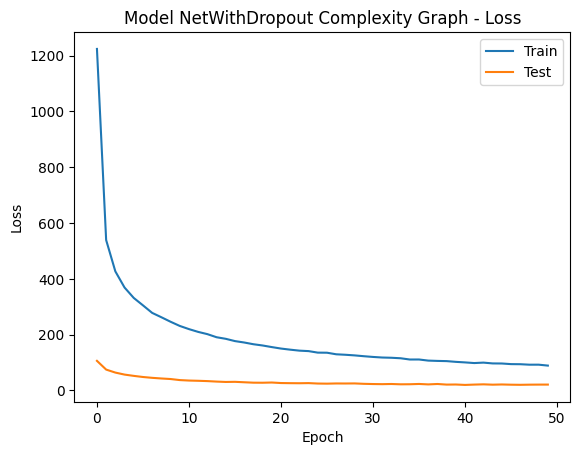

In [70]:
plt.plot(NetWithDropout_train_loss, label="Train")
plt.plot(NetWithDropout_test_loss, label="Test")
plt.title(f"Model {type(model_with_dropout).__name__} Complexity Graph - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

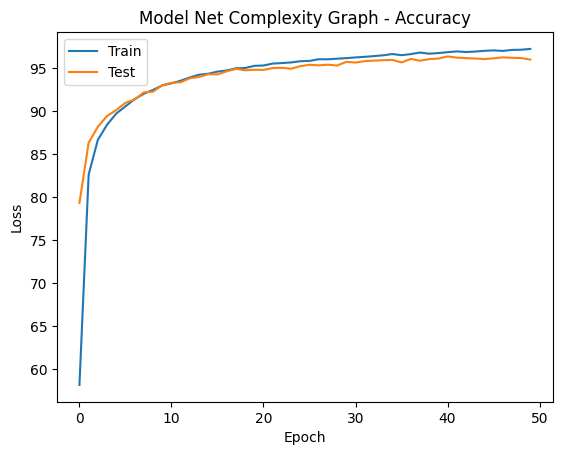

In [71]:
plt.plot(NetWithDropout_train_accuracy, label="Train")
plt.plot(NetWithDropout_test_accuracy, label="Test")
plt.title(f"Model {type(model).__name__} Complexity Graph - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

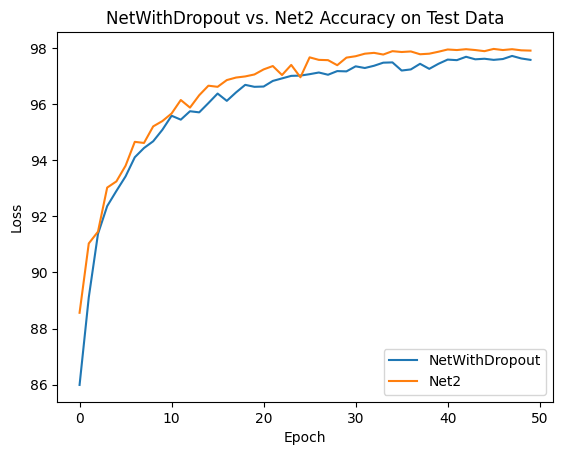

In [77]:
plt.plot(NetWithDropout_test_accuracy, label="NetWithDropout")
plt.plot(models_test_accuracy[2], label="Net2")
plt.title(f"NetWithDropout vs. Net2 Accuracy on Test Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

- The results of the model are quite impressive, achieving around 99% accuracy on the training data and 97% accuracy on the test data.
-However, it is worth noting that when compared to a similar model, Net2, which has a similar complexity but without dropout, we can observe that Net2 performs similarly, with a negligible difference. This is particularly interesting, considering that 20% of neurons are turned off in the first hidden layer and 50% in the second for each epoch, yet the results remain the same.

## Submitting Your Project on GitHub 🚀

Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
